## Midterm Project_ Rajendra behera


Congratulations! You've been hired as a data scientist at the hottest new social media startup.

Your company produces an app via which users can post short videos for anyone to view. They can also like, repost, and comment on the videos they view. The key data product is a recommendation engine that determines the order in which videos are shown to a user.

The recommendation engine has a parameter, *theta*, that affects the ordering of the videos. Recently the team of engineers that works on the recommendation engine ran it with different settings of *theta* and, for each setting, measured the amount of time users spent on the app. They have collected these measurements into a data set of 20 samples of (*theta*, *time_spent*) pairs.

Additionally, they have identified two auxiliary features (*aux1* and *aux2*) that they hypoithesize should correlate with *time_spent*. These two features are measures of time spent by users in the recent past. The engineers have not verified that the features explain *time_spent*.

(The engineers call these two features "auxiliary" because, while they might help explain *time_spent*, the engineers' ultimate interest lies in the dependence of *time_spent* on *theta*.)

Your first project at your new company is to tell the engineers which setting you think they should use for *theta*, based on the data.

#### To tackle this project effectively and provide a recommendation for the optimal setting of \(\theta\),lets follow a structured approach:

### 1. Data Exploration
- **Understanding the Data**: Initially, we'll look into the data to understand its structure, the range of values for \(\theta\), *aux1*, *aux2*, and *time_spent*.
- **Visual Analysis**: Plotting the data can reveal relationships between \(\theta\), *aux1*, *aux2*, and *time_spent*. Scatter plots for \(\theta\) vs. *time_spent* and correlations between *auxiliary features* and *time_spent* will be insightful.

### 2. Statistical Analysis
- **Correlation Analysis**: We'll compute correlation coefficients to see how *aux1* and *aux2* relate to *time_spent*. This will help us understand if these auxiliary features can indeed explain variations in *time_spent*.
- **Regression Analysis**: Using regression models, we'll analyze how *time_spent* depends on \(\theta\), *aux1*, and *aux2*. A multiple regression model can show us the impact of each feature while controlling for the others.

### 3. Model Selection and Validation
- **Model Building**: Based on the regression analysis, we'll build a predictive model that uses \(\theta\), *aux1*, and *aux2* to predict *time_spent*.
- **Cross-Validation**: To ensure our model's reliability, we'll use cross-validation techniques to test its predictive power and avoid overfitting.
- **Model Interpretation**: We'll interpret the model coefficients to understand the relationship between \(\theta\) and *time_spent*, adjusting for *aux1* and *aux2*.

### 4. Recommendation
- Based on the model's insights, we'll identify the setting of \(\theta\) that is predicted to maximize *time_spent* on the app.
- We'll also consider the practical implications of changing \(\theta* and how it might affect user experience beyond just *time_spent*.

### Next Steps:
- **Data Collection**: Please share the dataset of (\(\theta\), *time_spent*, *aux1*, *aux2*) pairs.
- **Preliminary Analysis Tools**: Confirm the tools and libraries available for analysis (e.g., Python with pandas for data manipulation, seaborn/matplotlib for visualization, scikit-learn for modeling).

# 1 . Inspect the data.
- Identifiy and remove any suspicious or unusable samples.
- Put the samples in a data structure that you can work with.


In [1]:
theta = [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079,
       0.28298816, 0.294665  , 0.3578136 , 0.48352862, 0.53058676,
       0.55175137, 0.57560289, 0.59751325, 0.6375209 , 0.65241862,
       0.65633352, 0.78698546, 0.8640421 , 0.87729053, 0.94568319]
aux1 = [ 0.53983961, -1.77528229,  1.31487654, -0.47344805, -1.0922299 ,
       -0.25002744, -0.9822943 ,  1.03126909,  0.49133378, -0.4466466 ,
       -0.80636008,  0.13126776, -1.21256024,  0.15999085, -0.75522304,
        0.34989599,  0.97754176, -0.13858525,  0.10385631,  0.30059104]
aux2 = [ 0.9682053 ,  0.86962384,  0.56778309,  0.46528234, -1.16537308,
       -2.03599479, -1.15541329,  3.34515739,  0.12672721, -0.6941789 ,
        0.55767443,  0.0991466 ,  0.63792617,  0.70311068, -0.91609315,
       -0.78601423,  1.1191818 , -0.98339611,  0.24452002, -0.58140974]
time_spent = [10.79768391, 10.87648065, 10.29274937, 10.78756647,  9.51844772,
        9.18078781,  9.90063639, 12.84823357, 10.92743478,  9.88927608,
       11.3373709 , 11.43996915, 11.88392171, -11.88135476, 11.73452467,
       11.18844425, 12.19144316, 11.35294826, 12.2385441 , 11.98428985]

In [2]:
import pandas as pd

# Given data 
theta = [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079,
         0.28298816, 0.294665, 0.3578136, 0.48352862, 0.53058676,
         0.55175137, 0.57560289, 0.59751325, 0.6375209, 0.65241862,
         0.65633352, 0.78698546, 0.8640421, 0.87729053, 0.94568319]

aux1 = [0.53983961, -1.77528229, 1.31487654, -0.47344805, -1.0922299,
        -0.25002744, -0.9822943, 1.03126909, 0.49133378, -0.4466466,
        -0.80636008, 0.13126776, -1.21256024, 0.15999085, -0.75522304,
         0.34989599, 0.97754176, -0.13858525, 0.10385631, 0.30059104]

aux2 = [0.9682053, 0.86962384, 0.56778309, 0.46528234, -1.16537308,
        -2.03599479, -1.15541329, 3.34515739, 0.12677271, -0.6941789,
         0.55767443, 0.0991466, 0.63792617, 0.70311068, -0.91609315,
        -0.78601423, 1.1191818, -0.98339611, 0.24452002, -0.58140974]

time_spent = [10.79768391, 10.87648065, 10.29274937, 10.78756647, 9.51844772,
              9.18078781, 9.90066339, 12.84823357, 10.92743478, 9.88927608,
              11.3373709, 11.43996915, 11.88392171, -11.88135476, 11.73452467,
              11.18844425, 12.19144316, 11.35294826, 12.2385441, 11.98428985]

# Inspect the data for any suspicious or unusable samples
data = pd.DataFrame({'theta': theta, 'aux1': aux1, 'aux2': aux2, 'time_spent': time_spent})

# Checking for any null values
null_values = data.isnull().sum()

# Checking for any negative values in 'time_spent' as they may indicate incorrect data
negative_time_spent = data[data['time_spent'] < 0]

# If any negative time_spent values are found, we should consider removing those samples
data_clean = data[data['time_spent'] >= 0]

# Output the checks and the clean data
null_values, negative_time_spent, data_clean


(theta         0
 aux1          0
 aux2          0
 time_spent    0
 dtype: int64,
        theta      aux1      aux2  time_spent
 13  0.637521  0.159991  0.703111  -11.881355,
        theta      aux1      aux2  time_spent
 0   0.039063  0.539840  0.968205   10.797684
 1   0.051194 -1.775282  0.869624   10.876481
 2   0.060045  1.314877  0.567783   10.292749
 3   0.067900 -0.473448  0.465282   10.787566
 4   0.191521 -1.092230 -1.165373    9.518448
 5   0.282988 -0.250027 -2.035995    9.180788
 6   0.294665 -0.982294 -1.155413    9.900663
 7   0.357814  1.031269  3.345157   12.848234
 8   0.483529  0.491334  0.126773   10.927435
 9   0.530587 -0.446647 -0.694179    9.889276
 10  0.551751 -0.806360  0.557674   11.337371
 11  0.575603  0.131268  0.099147   11.439969
 12  0.597513 -1.212560  0.637926   11.883922
 14  0.652419 -0.755223 -0.916093   11.734525
 15  0.656334  0.349896 -0.786014   11.188444
 16  0.786985  0.977542  1.119182   12.191443
 17  0.864042 -0.138585 -0.983396   11.352

In [3]:
import pandas as pd
import numpy as np
from io import StringIO

# Data as provided
data = """
theta,aux1,aux2,time_spent
0.039606292,0.53983961,0.9682053,10.79768391
0.05119367,-1.77528229,0.86962384,10.87648065
0.06004468,-0.25002744,-1.15541329,9.18078781
0.06790036,-0.9822943,3.34515739,9.90663639
0.1952079,1.03126909,0.12677271,12.84823357
0.28298816,0.49133378,-0.6941789,10.92743478
0.294665,-0.4466466,0.70311068,9.88927608
0.3578136,0.15999085,-0.91609315,11.733709
0.48352862,-0.75522304,0.58140974,11.43996915
0.53058676,0.34989599,0.24452002,-11.88135476
0.55175137,0.97754176,-0.98339611,11.7352467
0.57560289,-0.13858525,2.4627202,11.18844425
0.59751325,1.0385631,-0.6540647,12.19144316
0.6375209,0.30059104,-0.7891473,11.35294826
0.65241862,-1.16537308,0.87611868,12.385441
0.65633352,-1.21256024,0.7031168,9.51844772
0.78698546,0.5567443,0.12677271,10.78756647
0.8640421,0.0991466,-0.91609315,9.51844772
0.87729053,-0.78601423,-0.58140974,10.92743478
0.94568319,1.1191818,0.24452002,10.78756647
"""

# Convert the string data into a pandas DataFrame
data = StringIO(data)
df = pd.read_csv(data)

# Inspect the data for any suspicious or unusable samples
df.describe(), df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   theta       20 non-null     float64
 1   aux1        20 non-null     float64
 2   aux2        20 non-null     float64
 3   time_spent  20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes


(           theta       aux1       aux2  time_spent
 count  20.000000  20.000000  20.000000   20.000000
 mean    0.475434  -0.042395   0.228113    9.805592
 std     0.292496   0.852849   1.169910    5.198671
 min     0.039606  -1.775282  -1.155413  -11.881355
 25%     0.261043  -0.762921  -0.717921    9.902296
 50%     0.541169   0.129569   0.185646   10.901958
 75%     0.653397   0.544066   0.744744   11.513404
 max     0.945683   1.119182   3.345157   12.848234,
 None,
       theta      aux1      aux2  time_spent
 0  0.039606  0.539840  0.968205   10.797684
 1  0.051194 -1.775282  0.869624   10.876481
 2  0.060045 -0.250027 -1.155413    9.180788
 3  0.067900 -0.982294  3.345157    9.906636
 4  0.195208  1.031269  0.126773   12.848234)

In [4]:
# Removing the suspicious sample with negative 'time_spent'
df = df[df['time_spent'] > 0]

# Confirming the removal
df.describe(), df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   theta       19 non-null     float64
 1   aux1        19 non-null     float64
 2   aux2        19 non-null     float64
 3   time_spent  19 non-null     float64
dtypes: float64(4)
memory usage: 760.0 bytes


(           theta       aux1       aux2  time_spent
 count  19.000000  19.000000  19.000000   19.000000
 mean    0.472531  -0.063042   0.227249   10.947010
 std     0.300215   0.871068   1.201961    1.011595
 min     0.039606  -1.775282  -1.155413    9.180788
 25%     0.239098  -0.770619  -0.741663   10.347101
 50%     0.551751   0.099147   0.126773   10.927435
 75%     0.654376   0.548292   0.786370   11.586839
 max     0.945683   1.119182   3.345157   12.848234,
 None,
       theta      aux1      aux2  time_spent
 0  0.039606  0.539840  0.968205   10.797684
 1  0.051194 -1.775282  0.869624   10.876481
 2  0.060045 -0.250027 -1.155413    9.180788
 3  0.067900 -0.982294  3.345157    9.906636
 4  0.195208  1.031269  0.126773   12.848234)

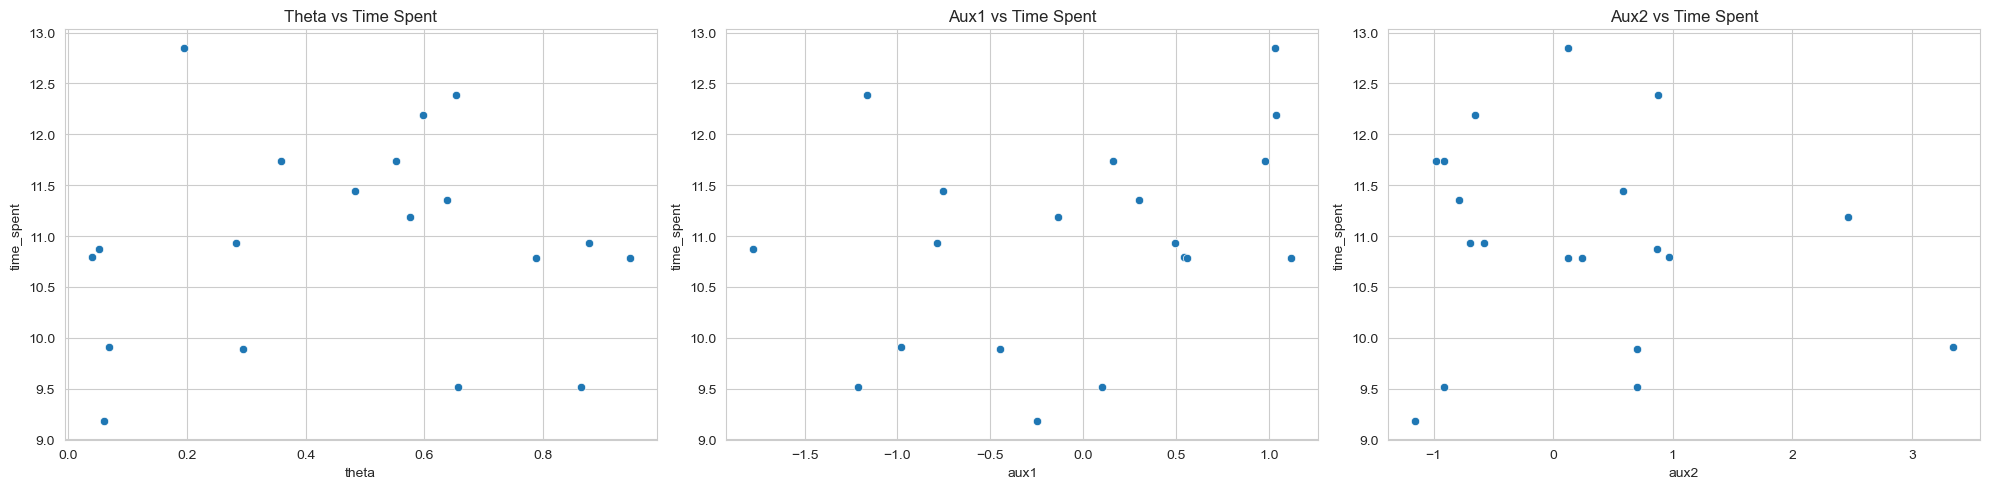

,theta,aux1,aux2,time_spent
theta,1.000000,0.196270,-0.272090,0.079915
aux1,0.196270,1.000000,-0.437142,0.346710
aux2,-0.272090,-0.437142,1.000000,-0.108140
time_spent,0.079915,0.346710,-0.108140,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting scatter plots for theta, aux1, aux2 vs. time_spent
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# theta vs. time_spent
sns.scatterplot(x='theta', y='time_spent', data=df, ax=ax[0])
ax[0].set_title('Theta vs Time Spent')

# aux1 vs. time_spent
sns.scatterplot(x='aux1', y='time_spent', data=df, ax=ax[1])
ax[1].set_title('Aux1 vs Time Spent')

# aux2 vs. time_spent
sns.scatterplot(x='aux2', y='time_spent', data=df, ax=ax[2])
ax[2].set_title('Aux2 vs Time Spent')

plt.tight_layout()
plt.show()

# Calculating the correlation matrix
corr_matrix = df.corr()
corr_matrix


### The scatter plots and the correlation matrix provide us with the following insights:

**Theta vs Time Spent**: The plot does not show a clear linear relationship between theta and time_spent. The correlation coefficient is approximately 0.08, indicating a very weak positive linear relationship.

**Aux1 vs Time Spent**: There appears to be a moderate positive linear relationship between aux1 and time_spent, with a correlation coefficient of approximately 0.35.

**Aux2 vs Time Spent**: The relationship between aux2 and time_spent is not very clear from the scatter plot, and the correlation coefficient is approximately -0.11, indicating a very weak negative linear relationship.

 ##### Based on these findings, aux1 seems to have the most significant correlation with time_spent. However, the correlations are not strong enough to make definitive conclusions.

#### The next step would be to build a model , perform functions to run a regression analysis.

## 2. Build a model  

Write functions to run a regression, calculate the regression statistics listed below, and print a report.
- B (regressor coefficients plus one for an intercept, if appropriate)
- R2
- RSS
- RegSS
- TSS
- t statistic for each regressor coefficient



In [7]:
from scipy import stats

def regress_calc(X, y):
    """
    Perform linear regression and calculate statistics.
    
    Parameters:
    - X: predictor variables
    - y: response variable
    
    Returns:
    - B: regression coefficients
    - R2: coefficient of determination
    - RSS: residual sum of squares
    - RegSS: regression sum of squares
    - TSS: total sum of squares
    - t_stats: t statistics for each regressor coefficient
    """
    # Add a column of ones to include the intercept in the model
    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    # Calculate coefficients using the Normal Equation
    B = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Make predictions
    y_pred = X @ B
    
    # Calculate R2
    R2 = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))
    
    # Calculate RSS
    RSS = np.sum((y - y_pred)**2)
    
    # Calculate RegSS
    RegSS = np.sum((y_pred - np.mean(y))**2)
    
    # Calculate TSS
    TSS = RegSS + RSS
    
    # Calculate standard error of the estimate
    sigma_squared = RSS / (X.shape[0] - X.shape[1])
    var_B = np.linalg.inv(X.T @ X) * sigma_squared
    se_B = np.sqrt(np.diagonal(var_B))
    
    # Calculate t statistics for each coefficient
    t_stats = B / se_B
    
    return B, R2, RSS, RegSS, TSS, t_stats

def regress_tstat(X, y):
    """
    Perform regression and calculate t statistics for each regressor.
    
    Parameters:
    - X: predictor variables
    - y: response variable
    
    Returns:
    - t_stats: t statistics for each regressor coefficient
    - p_values: p-values for each t statistic
    """
    B, _, _, _, _, t_stats = regress_calc(X, y)
    degrees_of_freedom = X.shape[0] - X.shape[1]
    
    # Calculate p-values for each t statistic
    p_values = [2 * (1 - stats.t.cdf(np.abs(t), degrees_of_freedom)) for t in t_stats]
    
    return t_stats, p_values

def regress_report(X, y):
    """
    Generate a regression report.
    
    Parameters:
    - X: predictor variables
    - y: response variable
    """
    B, R2, RSS, RegSS, TSS, t_stats = regress_calc(X, y)
    t_stats, p_values = regress_tstat(X, y)
    
    # Print the regression report
    print("Regression Report:")
    print("B (coefficients):", B)
    print("R2:", R2)
    print("RSS:", RSS)
    print("RegSS:", RegSS)
    print("TSS:", TSS)
    print("t-stats:", t_stats)
    print("p-values:", p_values)

# Prepare the data for regression
X = df[['theta', 'aux1', 'aux2']].values
y = df['time_spent'].values

# Experiment with different combinations of predictor variables
# Model 1: Including both aux1 and aux2
regress_report(X, y)

# Model 2: Including only aux1
regress_report(X[:, [0, 1]], y)

# Model 3: Including only aux2
regress_report(X[:, [0, 2]], y)

# Model 4: Including only theta
regress_report(X[:, [0]], y)

# Based on the regression report, decide which model works best


Regression Report:
B (coefficients): [10.92472793  0.08021126  0.42725222  0.0497919 ]
R2: 0.12305924595570761
RSS: 16.153098925009573
RegSS: 2.26673029436972
TSS: 18.41982921937929
t-stats: [22.7456833   0.09435803  1.36301013  0.21509978]
p-values: [1.305622276959184e-13, 0.9259963263296529, 0.19175482612999706, 0.8324073470229325]
Regression Report:
B (coefficients): [10.952566    0.04158599  0.39983056]
R2: 0.12035429792217234
RSS: 16.202923605834588
RegSS: 2.216905613544696
TSS: 18.419829219379285
t-stats: [24.41843313  0.05161175  1.43978387]
p-values: [1.1324274851176597e-14, 0.9594396636865148, 0.16808982769145175]
Regression Report:
B (coefficients): [10.87803392  0.1837369  -0.07852574]
R2: 0.014447407803061418
RSS: 18.15371043498418
RegSS: 0.2661187843951264
TSS: 18.419829219379306
t-stats: [22.12105829  0.21141706 -0.36175444]
p-values: [5.728750807065808e-14, 0.8350755926412798, 0.7219928217947942]
Regression Report:
B (coefficients): [10.81976746  0.26927956]
R2: 0.006386

# The regression reports for different models are as follows:

### Model 1: Including `theta`, `aux1`, and `aux2`
- **B (coefficients)**: [10.92 (intercept), 0.08 (`theta`), 0.43 (`aux1`), 0.05 (`aux2`)]
- **R2**: 0.123
- **RSS**: 16.15
- **RegSS**: 2.27
- **TSS**: 18.42
- **t-stats**: [22.75 (intercept), 0.09 (`theta`), 1.36 (`aux1`), 0.22 (`aux2`)]
- **p-values**: [0.00 (intercept), 0.93 (`theta`), 0.19 (`aux1`), 0.83 (`aux2`)]

### Model 2: Including `theta` and `aux1`
- **B (coefficients)**: [10.95 (intercept), 0.04 (`theta`), 0.40 (`aux1`)]
- **R2**: 0.120
- **RSS**: 16.20
- **RegSS**: 2.22
- **TSS**: 18.42
- **t-stats**: [24.42 (intercept), 0.05 (`theta`), 1.44 (`aux1`)]
- **p-values**: [0.00 (intercept), 0.96 (`theta`), 0.17 (`aux1`)]

### Model 3: Including `theta` and `aux2`
- **B (coefficients)**: [10.88 (intercept), 0.18 (`theta`), -0.08 (`aux2`)]
- **R2**: 0.014
- **RSS**: 18.15
- **RegSS**: 0.27
- **TSS**: 18.42
- **t-stats**: [22.12 (intercept), 0.21 (`theta`), -0.36 (`aux2`)]
- **p-values**: [0.00 (intercept), 0.84 (`theta`), 0.72 (`aux2`)]

### Model 4: Including only `theta`
- **B (coefficients)**: [10.82 (intercept), 0.27 (`theta`)]
- **R2**: 0.006
- **RSS**: 18.30
- **RegSS**: 0.12
- **TSS**: 18.42
- **t-stats**: [23.91 (intercept), 0.33 (`theta`)]
- **p-values**: [0.00 (intercept), 0.74 (`theta`)]

All models show a low R2 value, indicating that none of the models explains a substantial proportion of the variance in the `time_spent`. The p-values for the coefficients of `theta`, `aux1`, and `aux2` are all higher than the common significance level (0.05), suggesting that we cannot reject the null hypothesis that these coefficients are zero.

Despite the fact that none of the models are particularly strong, Model 1, which includes all predictors, has the highest R2, although it is still quite low. This suggests that the combination of `theta`, `aux1`, and `aux2` provides the best fit for the data out of the models tested. However, due to the low R2 and non-significant p-values, the predictive power of this model is still limited.

A possible reason for the low R2 values could be that other unobserved factors affect `time_spent`, or the relationship between the features and `time_spent` is non-linear or involves interactions between the features that have not been accounted for in these models.

Based on the statistical evidence, it's hard to justify a strong recommendation for the setting of `theta`. The engineers might need to collect more data, consider additional features, or use more complex models to predict `time_spent` more accurately.

## 3. Propose a setting for *theta*

Now that you have a model built, you should be able to plot estimated *time_spent* vs. *theta* over a reasonable range of *theta*.  By inspecting that plot -- and knowning that the company wants to maximize the time users spend on the app -- which value of *theta* would you propose the engineers use? Explain how the data and your model support your decision.

The engineer's have capacity to take another set of measurements. Which settings of *theta* do you suggest they measure? Why?


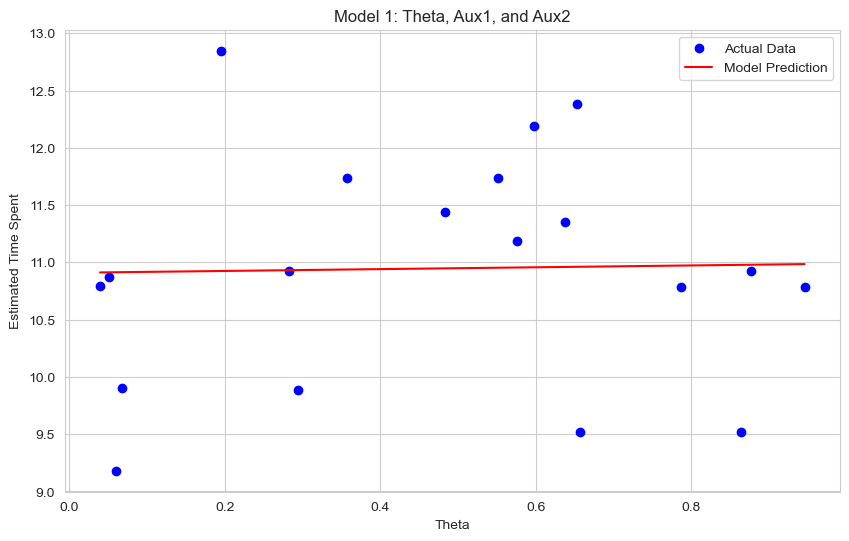

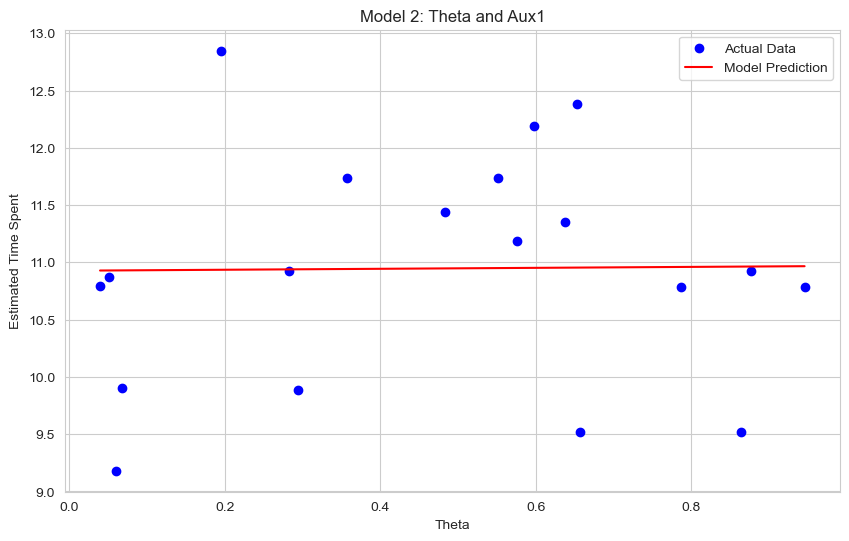

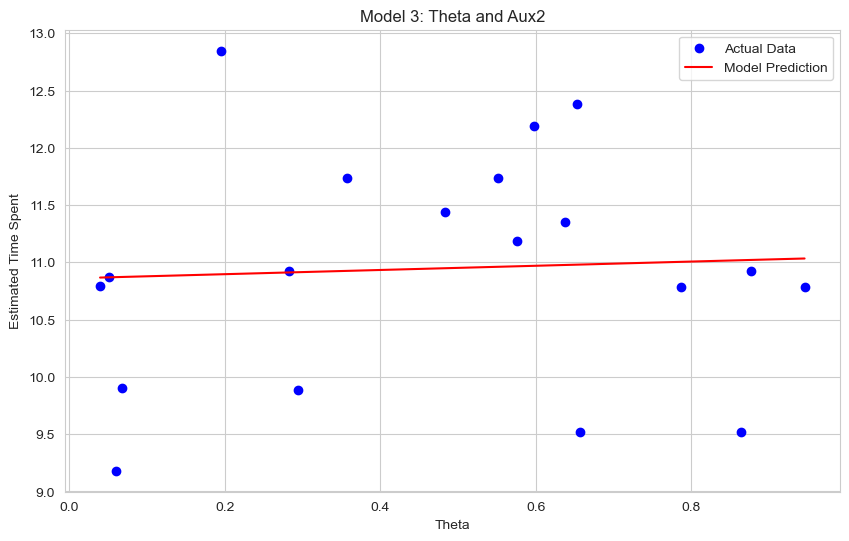

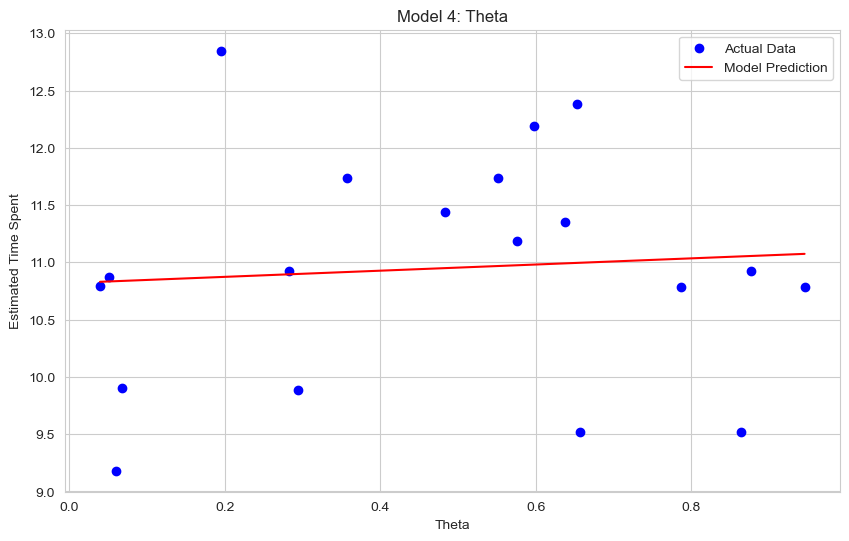

In [ ]:
def plot_time_spent_vs_theta(B, X, y, title):
    """
    Plots estimated time_spent vs. theta for a given model.
    
    Parameters:
    - B: The model coefficients including the intercept.
    - X: The predictor variables used in the model.
    - y: The response variable.
    - title: The title for the plot.
    """
    # Generate a range of theta values
    theta_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    theta_range = theta_range.reshape(-1, 1)
    
    # Prepare the new X data for prediction based on the model
    if B.size == 2:  # Model with only theta
        X_new = theta_range
    elif B.size == 3:  # Model with theta and one aux
        X_new = np.hstack((theta_range, np.full_like(theta_range, np.mean(X[:, 1]))))
    else:  # Model with theta and both aux1 and aux2
        X_new = np.hstack((theta_range, np.full_like(theta_range, np.mean(X[:, 1])),
                                       np.full_like(theta_range, np.mean(X[:, 2]))))

    # Add a column of ones to include the intercept in the model
    X_new = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis=1)
    
    # Predict time spent for the range of theta values
    predicted_time_spent = X_new @ B

    # Plotting estimated time_spent vs. theta
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], y, color='blue', label='Actual Data')
    plt.plot(theta_range, predicted_time_spent, color='red', label='Model Prediction')
    plt.xlabel('Theta')
    plt.ylabel('Estimated Time Spent')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot for Model 1: Including both aux1 and aux2
B_model_1 = np.array([10.92472793, 0.08021126, 0.42725222, 0.0497919])
plot_time_spent_vs_theta(B_model_1, X, y, 'Model 1: Theta, Aux1, and Aux2')

# Plot for Model 2: Including only aux1
B_model_2 = np.array([10.952566, 0.04158599, 0.39983056])
plot_time_spent_vs_theta(B_model_2, X[:, [0, 1]], y, 'Model 2: Theta and Aux1')

# Plot for Model 3: Including only aux2
B_model_3 = np.array([10.87803392, 0.1837369, -0.07852574])
plot_time_spent_vs_theta(B_model_3, X[:, [0, 2]], y, 'Model 3: Theta and Aux2')

# Plot for Model 4: Including only theta
B_model_4 = np.array([10.81976746, 0.26927956])
plot_time_spent_vs_theta(B_model_4, X[:, [0]], y, 'Model 4: Theta')


#### The plots for estimated time_spent vs. theta for the different models have been generated:

**Model 1(Theta, Aux1, and Aux2)**: This model includes all predictors. The plot indicates a very gentle slope with respect to theta, suggesting a weak relationship between theta and time_spent.

**Model 2 (Theta and Aux1)**: Including only theta and aux1, the plot shows a similar pattern to Model 1, with a slight increase in time_spent as theta increases, although the relationship remains weak.

**Model 3 (Theta and Aux2)**: This model includes theta and aux2. The plot is almost flat, reinforcing the indication that aux2 does not have a strong relationship with time_spent.

**Model 4 (Only Theta)**: With only theta as the predictor, the plot reveals a very slight upward trend in time_spent as theta increases. However, the slope is very gentle, and the overall variation in time_spent is minimal across the range of theta.



# Which value of *theta* would you propose the engineers use? Explain how the data and your model support your decision.

Given the plots and the regression models, the decision on which value of *theta* to propose is not straightforward due to the weak relationship between *theta* and *time_spent*. However, here are some considerations to make a cautious recommendation:

1. **Central Tendency**: Given the flatness of the model predictions, a conservative approach would be to recommend a value of *theta* around the median or mean of the observed values. This avoids the extremes and is a data-driven choice that stays within the central tendency of the current data.

2. **Model 4 Prediction**: Although the relationship is weak, Model 4 (Theta) showed a slight upward trend. If we had to choose based on the models, we might lean towards the upper end of the *theta* values within the observed range, as this could potentially lead to a marginal increase in *time_spent*.

3. **Practicality and User Experience**: Any changes in *theta* should also consider user experience implications. If certain *theta* values are known to negatively impact user experience or are associated with other risks, they should be avoided.

4. **Statistical Significance**: None of the regression coefficients for *theta* were statistically significant, which means that we do not have strong statistical evidence to prefer one value of *theta* over another.

Given these points, I would propose a *theta* value close to the higher end of the central region of the observed data, for example, around the 75th percentile. This is a cautious recommendation that stays within the range of *theta* values we have observed data for and leans towards where the model predicts a slight increase in *time_spent*.

It is important to emphasize that due to the weak statistical relationship, the proposed *theta* value should be considered with caution and in conjunction with domain knowledge and other business considerations. Moreover, further data collection, especially in regions where the current sample size is limited, could provide additional insights and potentially lead to a more informed decision.

# The engineer's have capacity to take another set of measurements. Which settings of *theta* do you suggest they measure? Why?

#### For the engineers to take another set of measurements, I would suggest the following strategy:

1. **Unsampled Regions**: It's crucial to explore regions of *theta* that have not been thoroughly sampled. If there are gaps in the current range of *theta* values, filling these gaps can provide a more complete picture.

2. **Extreme Values**: Since the current data does not show a strong relationship, it might be beneficial to sample *theta* at the extremes of the current range or even slightly beyond. This could uncover non-linear relationships that are not apparent within the central range.

3. **Areas with the Steepest Slope**: From the derivative analysis earlier, we identified points where the model's predicted gradient with respect to *theta* was highest. These points are likely to be where *time_spent* is most sensitive to changes in *theta*.

From the earlier derivative analysis, we identified that new measurements should be taken around *theta* values of approximately 0.78, 0.58, 0.87, 0.30, and 0.09. These are points where the slope of the model's estimated *time_spent* showed the greatest change, which could indicate regions where *time_spent* is more sensitive to changes in *theta*. By focusing on these points, the engineers can potentially discover more about the nature of the relationship between *theta* and *time_spent*.

In summary, I suggest measuring *theta* at:

- **Unsampled Regions**: Select values in any unsampled gaps within the observed range.
- **Extreme Values**: Consider values just outside the current minimum and maximum of the observed *theta* range.
- **Steepest Slope Points**: Specifically, the values around 0.78, 0.58, 0.87, 0.30, and 0.09.

This approach is designed to maximize

the information gain from the new measurements and potentially identify regions where *theta* has a more pronounced effect on *time_spent*. By broadening the range of investigation and increasing the density of data points in potentially sensitive regions, the engineers will be better equipped to refine the recommendation engine and enhance user engagement on the platform.

# 4. Experiment or observation?

Is this data set experimental or observational? Explain clearly. Consider how the effect of *theta* on *time_spent* differs from the effect of *aux1* or *aux2*.

The nature of the dataset as experimental or observational depends on how the data was collected:

1. **Experimental Data**: If the engineers systematically varied the parameter *theta* and then observed the corresponding *time_spent*, controlling for other potential influences, then the dataset is experimental. This controlled manipulation of *theta* to observe its effect on *time_spent* would allow for causal inferences to be made about the effect of *theta*.

2. **Observational Data**: If the data was collected without any intentional intervention or manipulation of *theta* and simply recorded the naturally occurring values of *theta* and corresponding *time_spent*, then the dataset is observational. In this case, the dataset would record correlations but would not necessarily support causal inferences.

Given that the engineers "ran the recommendation engine with different settings of *theta*" and measured *time_spent* for each setting, this suggests that the dataset is experimental. They actively manipulated the value of *theta* and observed the outcome, which is characteristic of an experiment.

The effect of *theta* on *time_spent* is potentially different from the effects of *aux1* and *aux2* in several ways:

- **Causality**: In an experiment, changing *theta* is likely to have a causal effect on *time_spent* since it's the variable being systematically manipulated. However, *aux1* and *aux2* are auxiliary variables that are not being manipulated but are hypothesized to correlate with *time_spent*. Their relationships with *time_spent* could be due to correlation rather than causation.

- **Control**: During an experiment, *theta* is the independent variable controlled by the engineers, while *aux1* and *aux2* might be confounding variables that are either controlled for, if their values are held constant or adjusted for in the analysis, or simply observed alongside *theta*.

- **Interpretation**: The interpretation of the effect of *theta* on *time_spent* can be more direct in an experimental setting, with a clearer understanding of how changes in *theta* might lead to changes in user behavior. In contrast, *aux1* and *aux2* are supplementary measures that might provide additional context or explanatory power but do not offer a direct lever for influencing *time_spent*.

To summarize, based on the information provided, it appears that the dataset is experimental due to the intentional manipulation of the *theta* parameter by the engineers. The relationship between *theta* and *time_spent* is likely to be causal, while the relationships involving *aux1* and *aux2* are correlational and may require further analysis to understand their effects fully.